In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
#! 首先通过更改所有匹配项来把 country和sports改为 0,1 的数据
data=np.loadtxt('word_data.txt')
x=np.delete(data,[0],axis=1)#! axis=1 是删除列
print(x)
print(data)
y=data[:,0].copy()
print(y)


[[-6.2065e-04  8.5125e-01  2.6492e-01 ...  4.1076e-01 -6.9626e-01
   7.1331e-01]
 [-3.8060e-01  1.0751e+00  2.5990e-01 ... -6.3190e-01 -6.8910e-01
   1.2523e+00]
 [ 5.9750e-01  4.3610e-01  3.7440e-01 ...  6.4470e-01 -4.6200e-01
   2.4480e-01]
 ...
 [-3.3900e-02 -2.8830e-01  2.1630e-01 ...  2.6180e-01  1.6810e-01
  -2.6780e-01]
 [ 1.3956e+00 -4.5620e-01  8.0600e-01 ... -2.4130e-01  1.2290e-01
   3.0470e-01]
 [-6.6680e-01 -3.7220e-01  9.1730e-01 ...  1.0887e+00  6.7110e-01
   7.2020e-01]]
[[ 0.0000e+00 -6.2065e-04  8.5125e-01 ...  4.1076e-01 -6.9626e-01
   7.1331e-01]
 [ 0.0000e+00 -3.8060e-01  1.0751e+00 ... -6.3190e-01 -6.8910e-01
   1.2523e+00]
 [ 0.0000e+00  5.9750e-01  4.3610e-01 ...  6.4470e-01 -4.6200e-01
   2.4480e-01]
 ...
 [ 1.0000e+00 -3.3900e-02 -2.8830e-01 ...  2.6180e-01  1.6810e-01
  -2.6780e-01]
 [ 1.0000e+00  1.3956e+00 -4.5620e-01 ... -2.4130e-01  1.2290e-01
   3.0470e-01]
 [ 1.0000e+00 -6.6680e-01 -3.7220e-01 ...  1.0887e+00  6.7110e-01
   7.2020e-01]]
[0. 0. 0. 0. 0. 

In [ ]:

k_score=[]
#! 一共有40条数据 差不多到k取三十之后就没用了 这个范围是要自己看数据量决定的
for k in range(1,31):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
    print(scores)
    
    k_score.append(np.mean(scores))
    
print(k_score)

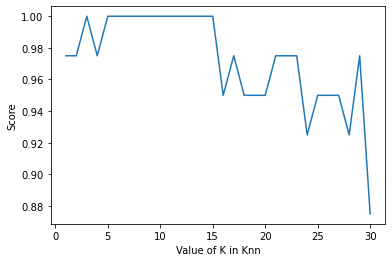

In [17]:
plt.plot(range(1,31),k_score) #x轴为k值 y轴为k值 得分数
plt.xlabel('Value of K in Knn')
plt.ylabel('Score')
plt.show()

In [18]:
#! 根据图找到合适的k
k=10
knn = KNeighborsClassifier(n_neighbors=k)
#训练模型:特征数据必须是二维的
knn.fit(x,y)

knn.predict(x)
print('模型分类结果：',knn.predict(x))
print('真实的结果：',y)

模型分类结果： [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
真实的结果： [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [24]:

#! 降维 想找到降到哪合适
from sklearn.decomposition import PCA
import numpy as np

score=0
best_n=0
for n in range(1,41):#n_components must be between 0 and min(n_samples, n_features)=40 with svd_solver='full'
    
    pca=PCA(n_components=n)
    pca.fit(x)
    #! 降维完成

#! 利用之前找到比较合适的knn器
    X=pca.transform(x)
    knn.fit(X,y)
    if score<=knn.score(X,y):
        best_n=n
        score=knn.score(X,y)
        print(best_n,score)
        
print('===============')   
print(best_n,score)

1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
40 1.0
